In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


**Now Load DataSet**

In [ ]:
from google.colab import files
upload = files.upload()

Saving Diwali Sales Data.csv to Diwali Sales Data.csv


**Import CSV File**

In [ ]:
df = pd.read_csv("Diwali Sales Data.csv",encoding="unicode_escape")


In [ ]:
df.shape

(11251, 15)

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


**Drop unreleated/blank columns**

In [ ]:
df.drop(['Status','unnamed1'],axis=1 ,inplace=True)

**check null values**

In [ ]:
pd.isnull(df).sum()
# or

#df.isnull.sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


**Drop null values**

In [ ]:
df.dropna(inplace=True)

**Change Data type**

In [ ]:
df['Amount']=df['Amount'].astype('int')

In [ ]:
df['Amount'].dtypes

dtype('int64')

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

**Columns Name Change**

In [ ]:
df.rename(columns={'Marital_Status':'Shaadi'},inplace=True)


In [ ]:
df.describe()

,User_ID,Age,Shaadi,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [ ]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


<Axes: xlabel='Gender', ylabel='Amount'>

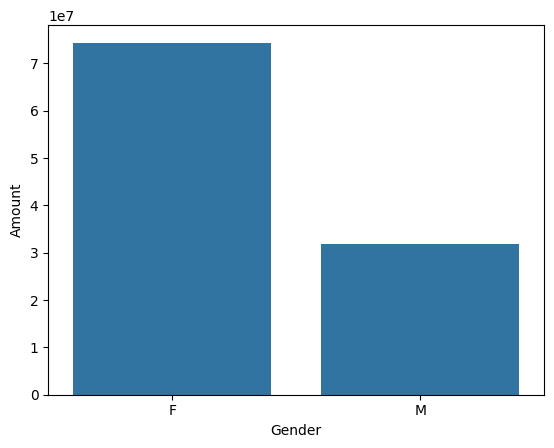

In [ ]:
sales_gend = df.groupby(['Gender'],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gend)

From above graphs we can see that most of the buyers are females

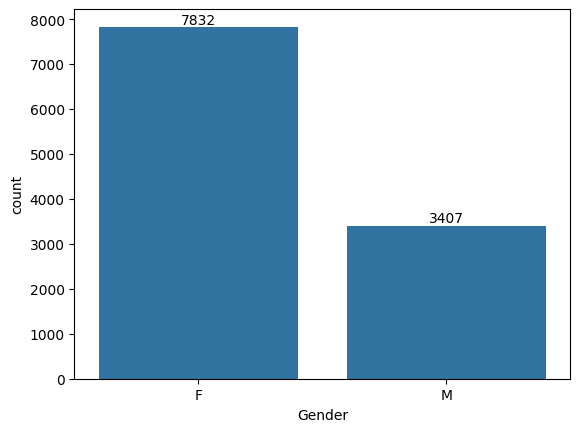

In [ ]:
px = sns.countplot(x='Gender',data=df)
for bars in px.containers:
  px.bar_label(bars)

**Age**

[Text(0, 0, '3269'),
 Text(0, 0, '162'),
 Text(0, 0, '1305'),
 Text(0, 0, '553'),
 Text(0, 0, '693'),
 Text(0, 0, '272'),
 Text(0, 0, '1578')]

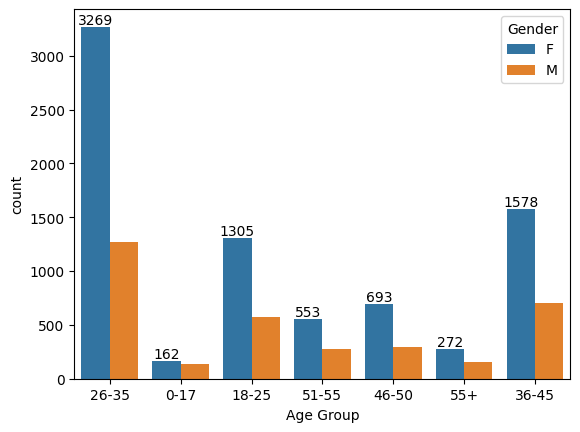

In [ ]:
bx = sns.countplot(data=df,x='Age Group',hue='Gender')  # jab ham hue use krte hai to container me 2 object store hote hai sirf iske liye
bx.bar_label(bx.containers[0])
#bx.bar_label(bx.containers[1])
#for bars in bx.containers:
 # bx.bar_label(bars)


<ipython-input-20-ecdc6071dddc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group',y='Amount',data=sales_age,palette='coolwarm')


<Axes: xlabel='Age Group', ylabel='Amount'>

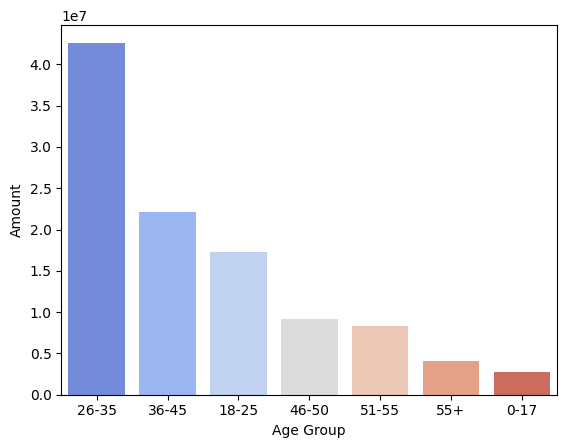

In [ ]:
sales_age =df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age,palette='coolwarm')

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

# ***State***

<ipython-input-21-67ff5e89bd9a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State',y='Orders',data=sales_state,palette='rocket')


<Axes: xlabel='State', ylabel='Orders'>

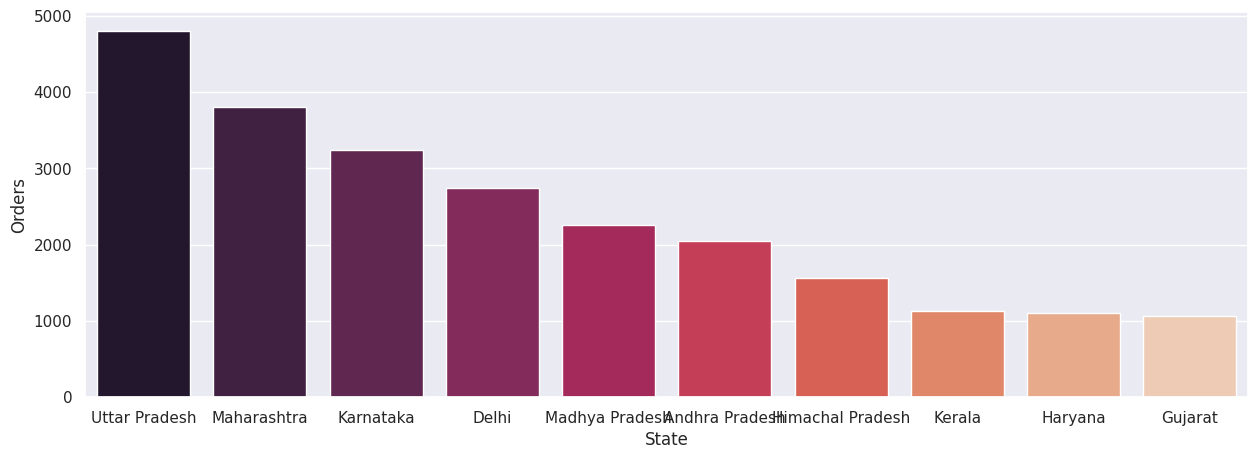

In [ ]:
sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Orders',data=sales_state,palette='rocket')

<ipython-input-22-580f1f90e738>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='State',y='Amount',data=sales_state,palette="viridis") # palette = 'viridis' is old method use hue = 'state' or  legend = False


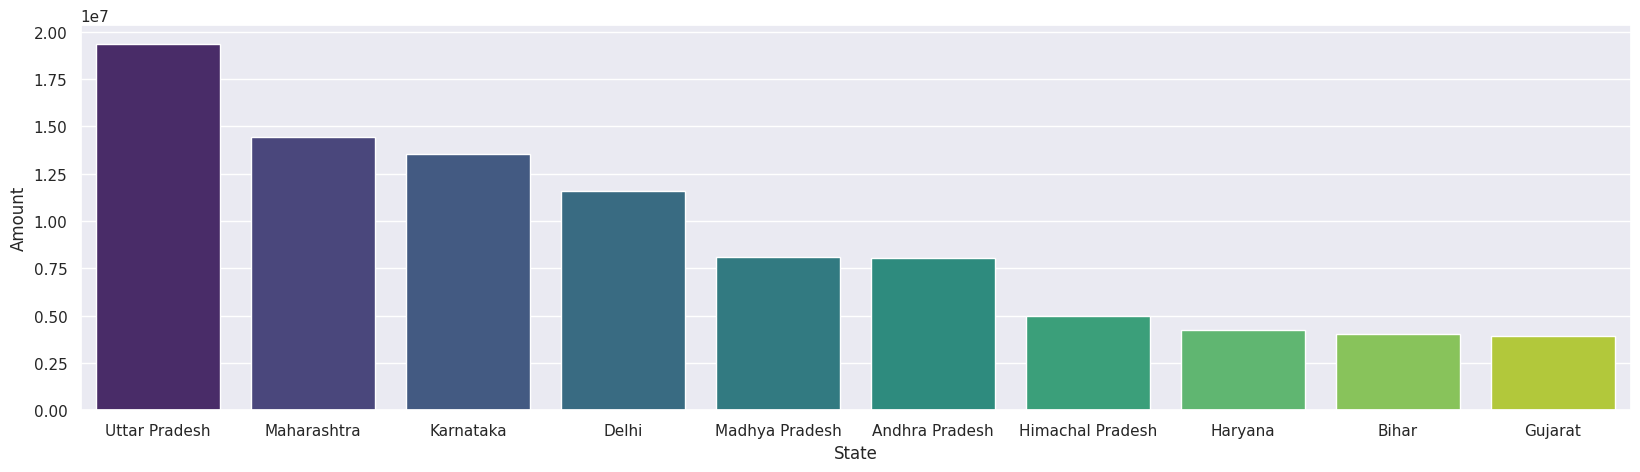

In [ ]:
sales_state = df.groupby(['State'],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.barplot(x='State',y='Amount',data=sales_state,palette="viridis") # palette = 'viridis' is old method use hue = 'state' or  legend = False
#for bars in ax.containers:
#  ax.bar_label(bars)
#plt.ticklabel_format(style='plain',axis='y') # use for orginal values

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

# **Marital Status**

<ipython-input-23-06bfde0f5c41>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sx=sns.countplot(x='Shaadi',data=df,palette="viridis") #Blues,magma


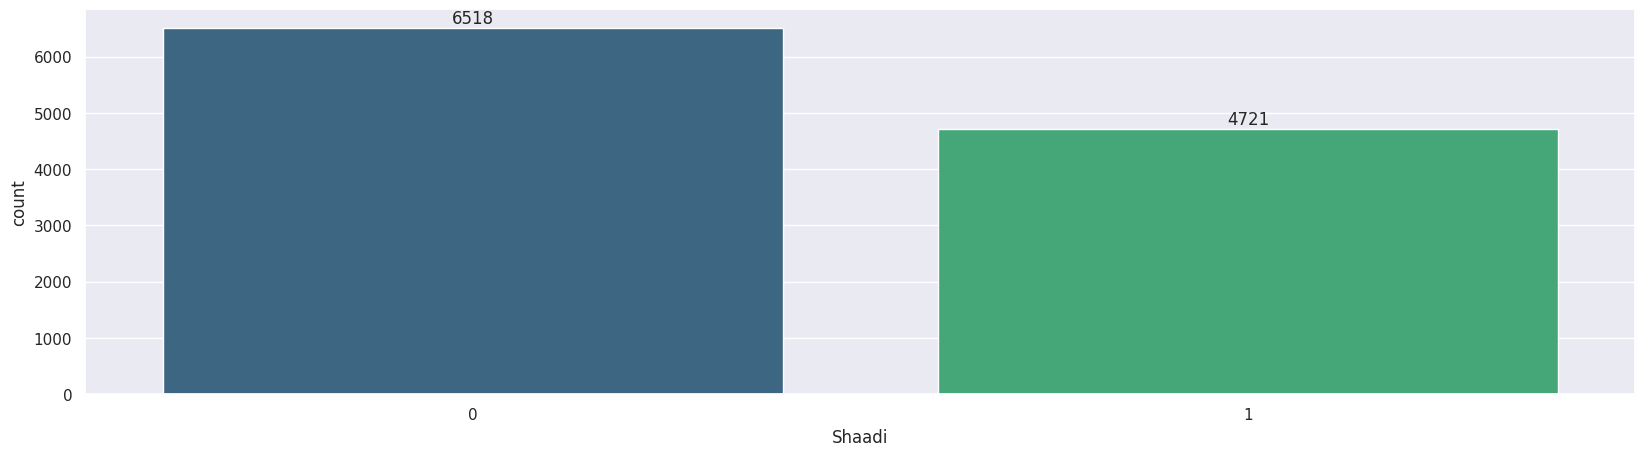

In [ ]:
sx=sns.countplot(x='Shaadi',data=df,palette="viridis") #Blues,magma

sns.set(rc={'figure.figsize':(7,5)})

for bars in sx.containers:
  sx.bar_label(bars)

<Axes: xlabel='Shaadi', ylabel='Amount'>

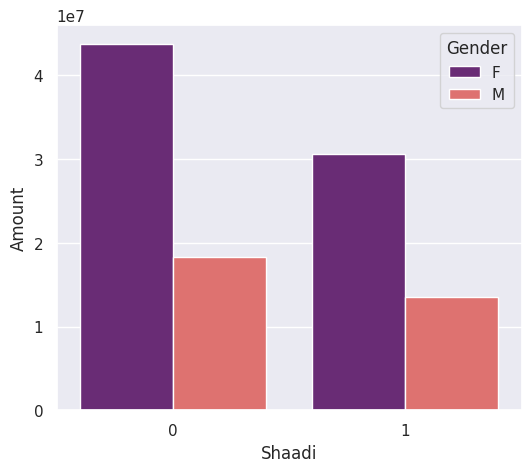

In [ ]:
sales_state=df.groupby(['Shaadi','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(x='Shaadi',y='Amount',hue='Gender',data=sales_state,palette='magma')



From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

# **Occupation**

<ipython-input-25-2bbe540c0e11>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Occupation',palette="viridis")


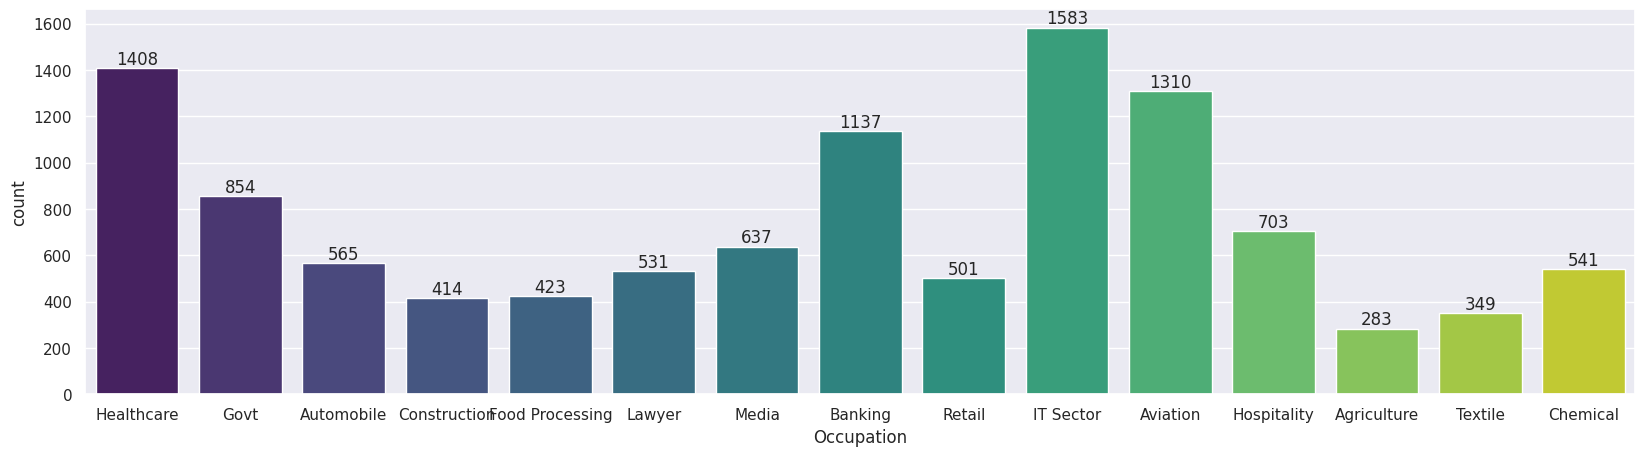

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation',palette="viridis")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

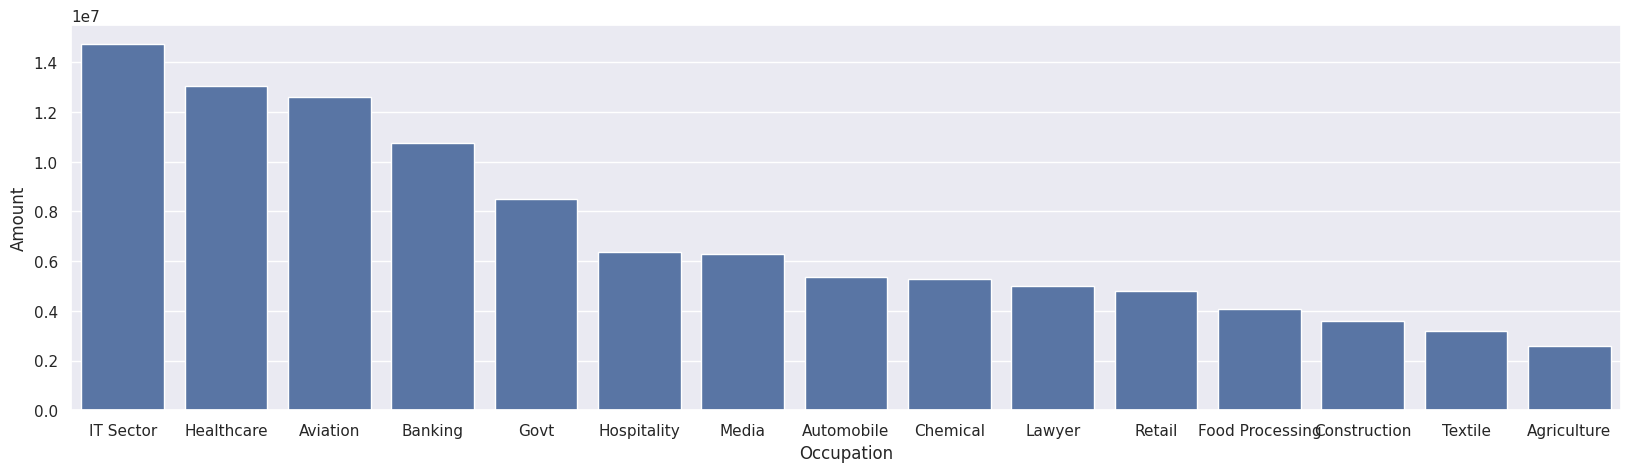

In [ ]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

# **Product Category**

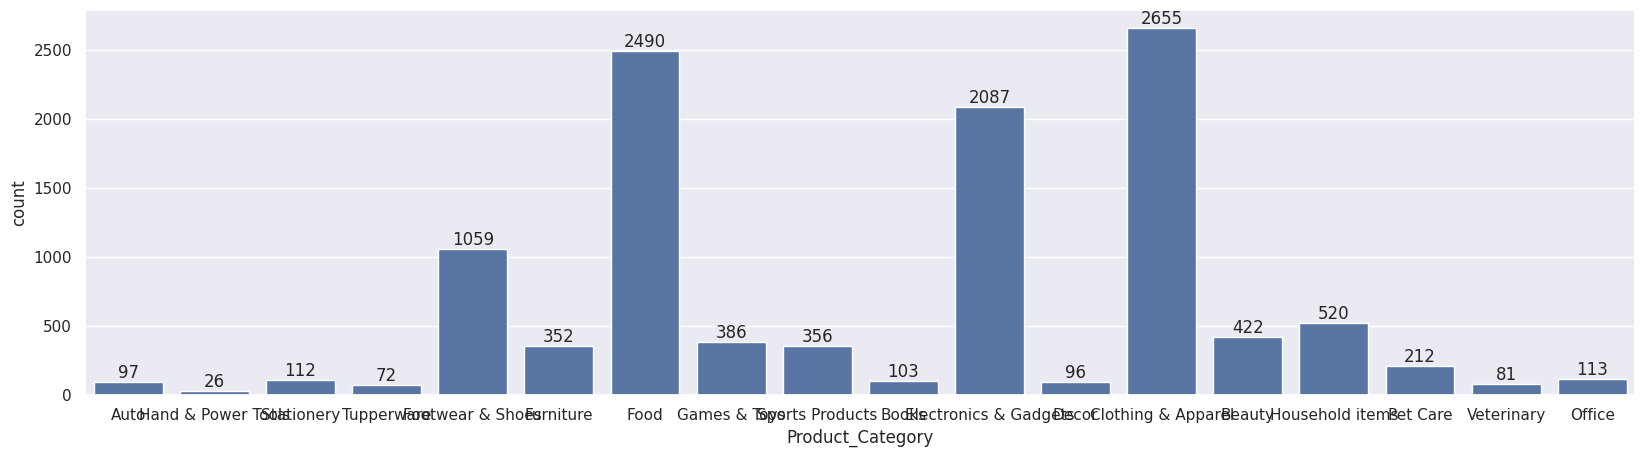

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

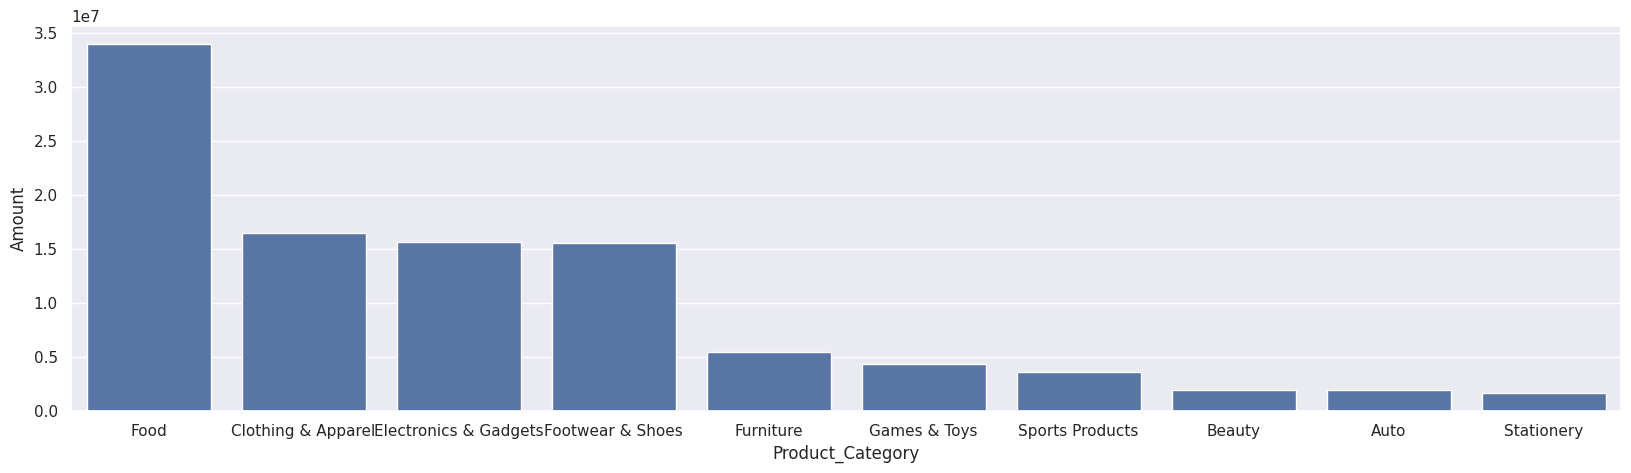

In [ ]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

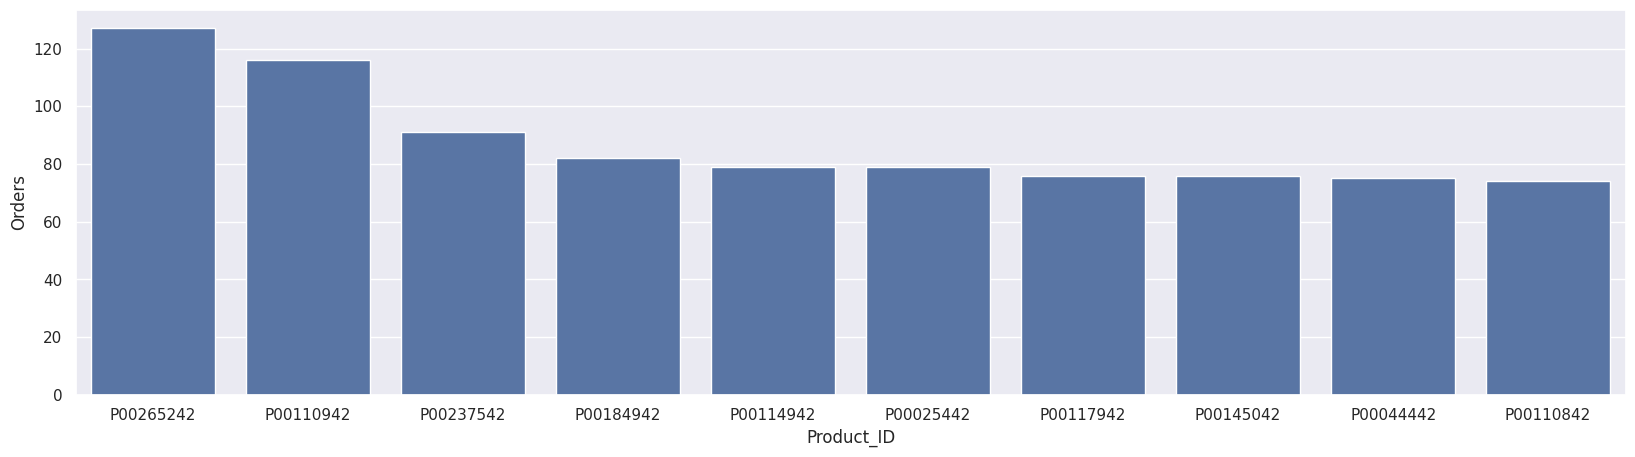

In [ ]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

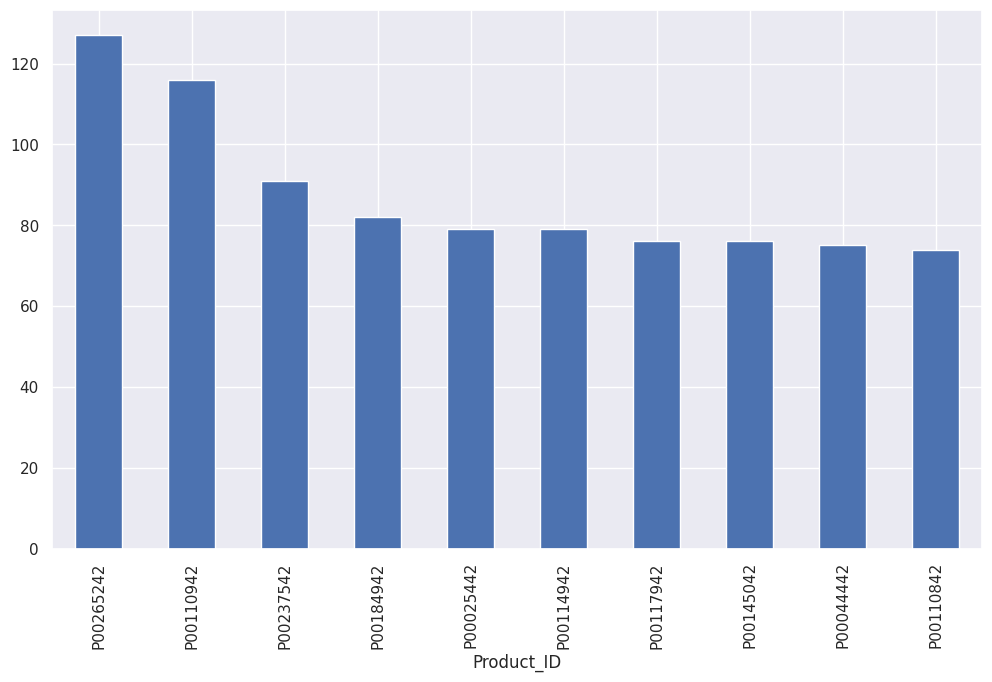

In [ ]:
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

**Conclusion:**

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category